# Homework 4: Data Visualization
- **Name**:  Sangeeth Panthakkal Das
- **UB Username**: spanthak
- **UB Person Number**:  50469175

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

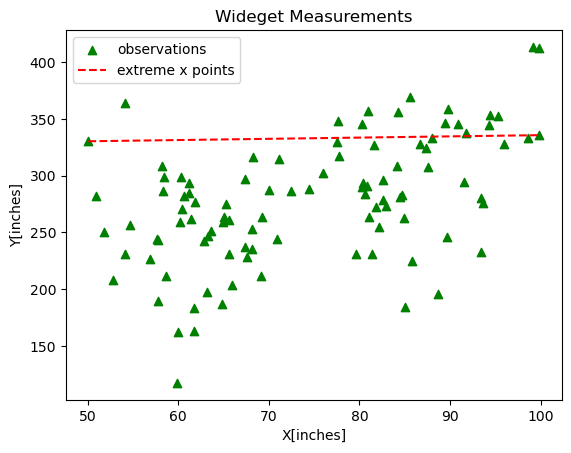

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#importing file
data = pd.read_csv('scatter_data.csv')
data = data[~data['% x'].str.startswith('%')] #removing % rows

#converting to array
data2 = data.values
dimensions = np.shape(data2)
rows, columns = dimensions
#converting to float values
for i in range(rows):
    data2[i][0] = float(data2[i][0])
    data2[i][1] = float(data2[i][1])
    
#finding min and max
minimum = 10000000000000000000000000
maximum = -10000000000000000000
for i in range(rows):
    if data2[i][0] < minimum:
        minimum = data2[i][0]
        min_y = data2[i][1]
    if data2[i][0] > maximum:
        maximum = data2[i][0]
        max_y = data2[i][1]
#x values and y values to plot the lines between extreme points
x_values = [minimum, maximum]
y_values = [min_y, max_y]

#plotting
plt.title('Wideget Measurements')
plt.scatter(data2[:, 0], data2[:, 1], c='green', marker='^')
plt.plot(x_values, y_values, linestyle='dashed', color='red')
plt.xlabel('X [inches]')
plt.ylabel('Y [inches]')
plt.legend(["observations", "extreme x points"], loc ="upper left")
plt.show()

### Problem 2 - Histogram

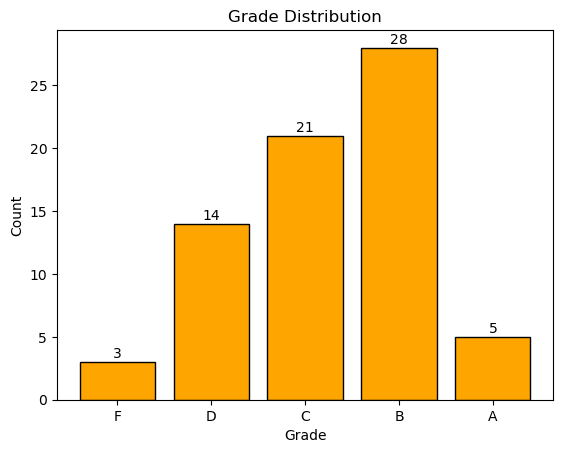

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#importing file
data = pd.read_csv('student_grades.csv')
data = data[~data['% studentID'].astype(str).str.startswith('%')] #removing % rows

X = ['F', 'D', 'C', 'B', 'A']
Y = [0, 0, 0, 0, 0]     #array to store the grade summary in the order F,D,C,B and A

#findin grades
for points in data[" avgScore "]:
    if points >= 90 and points <= 100:
        Y[4] = Y[4] + 1
    if points >= 80 and points <= 90:
        Y[3] = Y[3] + 1
    if points >= 70 and points < 80:
        Y[2] = Y[2] + 1
    if points >= 60 and points < 70:
        Y[1] = Y[1] + 1
    if points < 60:
        Y[0] = Y[0] + 1
        
#plotting
fig, ax = plt.subplots()
bars = ax.bar(X, Y, color = 'orange', edgecolor = 'black')

ax.set_title('Grade Distribution')
ax.set_xlabel('Grade')
ax.set_ylabel('Count')
for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.3,
        round(bar.get_height(), 1),
        horizontalalignment='center'
  )

plt.show()

### Problem 3 - Barplot and Boxplot in the Same Figure

Text(0.5, 0, 'Heuristic Method')

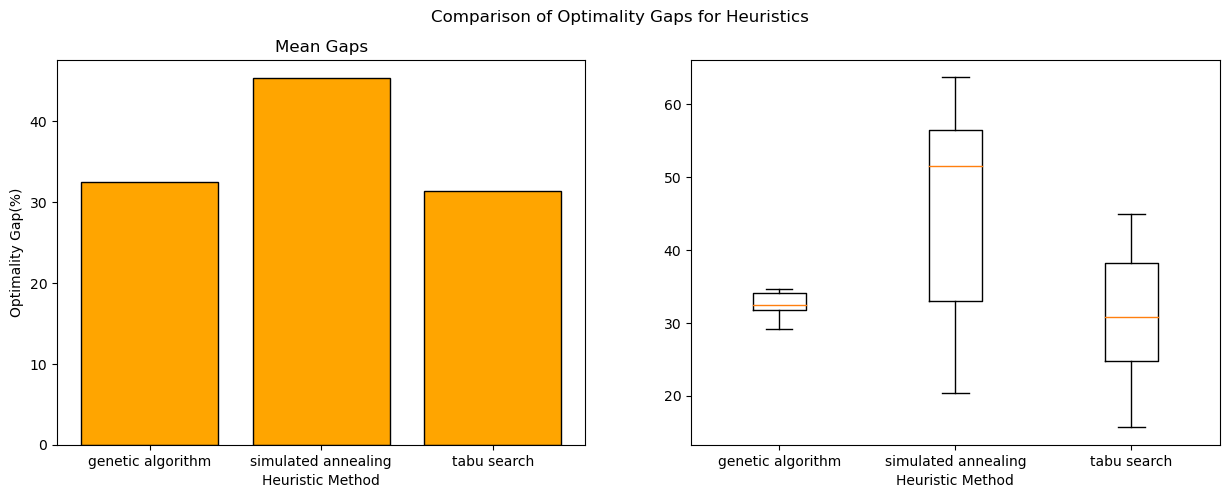

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#importing file
data = pd.read_csv('solution_data.csv')
data = data[~data['% Problem'].astype(str).str.startswith('%')] #removing % rows

#converting to array
data = data.values
n = int(len(data)/4)

optimal = np.zeros(n)
ga = np.zeros(n)
sa = np.zeros(n)
tabu = np.zeros(n)
for i in data:
    if i[1] == 'optimal':
        optimal[i[0]] = i[2]
    if i[1] == 'simulated annealing':
        sa[i[0]] = i[2]
    if i[1] == 'genetic algorithm':
        ga[i[0]] = i[2]
    if i[1] == 'tabu search':
        tabu[i[0]] = i[2]
        
for i in range(n):
    sa[i] = ((optimal[i] - sa[i])/optimal[i])*100
    ga[i] = ((optimal[i] - ga[i])/optimal[i])*100
    tabu[i] = ((optimal[i] - tabu[i])/optimal[i])*100
    
avg_sa = sum(sa)/len(sa)
avg_ga = sum(ga)/len(ga)
avg_tabu = sum(tabu)/len(tabu)

X = ['genetic algorithm', 'simulated annealing', 'tabu search']
bar_Y = [avg_ga, avg_sa, avg_tabu]

box_data = [ga, sa, tabu]

#plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Comparison of Optimality Gaps for Heuristics')

bars = ax1.bar(X, bar_Y, color = 'orange', edgecolor = 'black')
ax1.set_title('Mean Gaps')
ax1.set_xlabel('Heuristic Method')
ax1.set_ylabel('Optimality Gap(%)')

ax2.boxplot(box_data)
ax2.set_xticklabels(X)
ax2.set_xlabel('Heuristic Method')

--- 
## Part 2 - Explore New Plot Types

This plot shows the reporting relations in a firm

- **URL of Example Code**:  https://networkx.org/documentation/stable/tutorial.html- **URL of Sample Data**:  https://github.com/ecdedios/networkx-quick-start/blob/master/jira_sample.csv

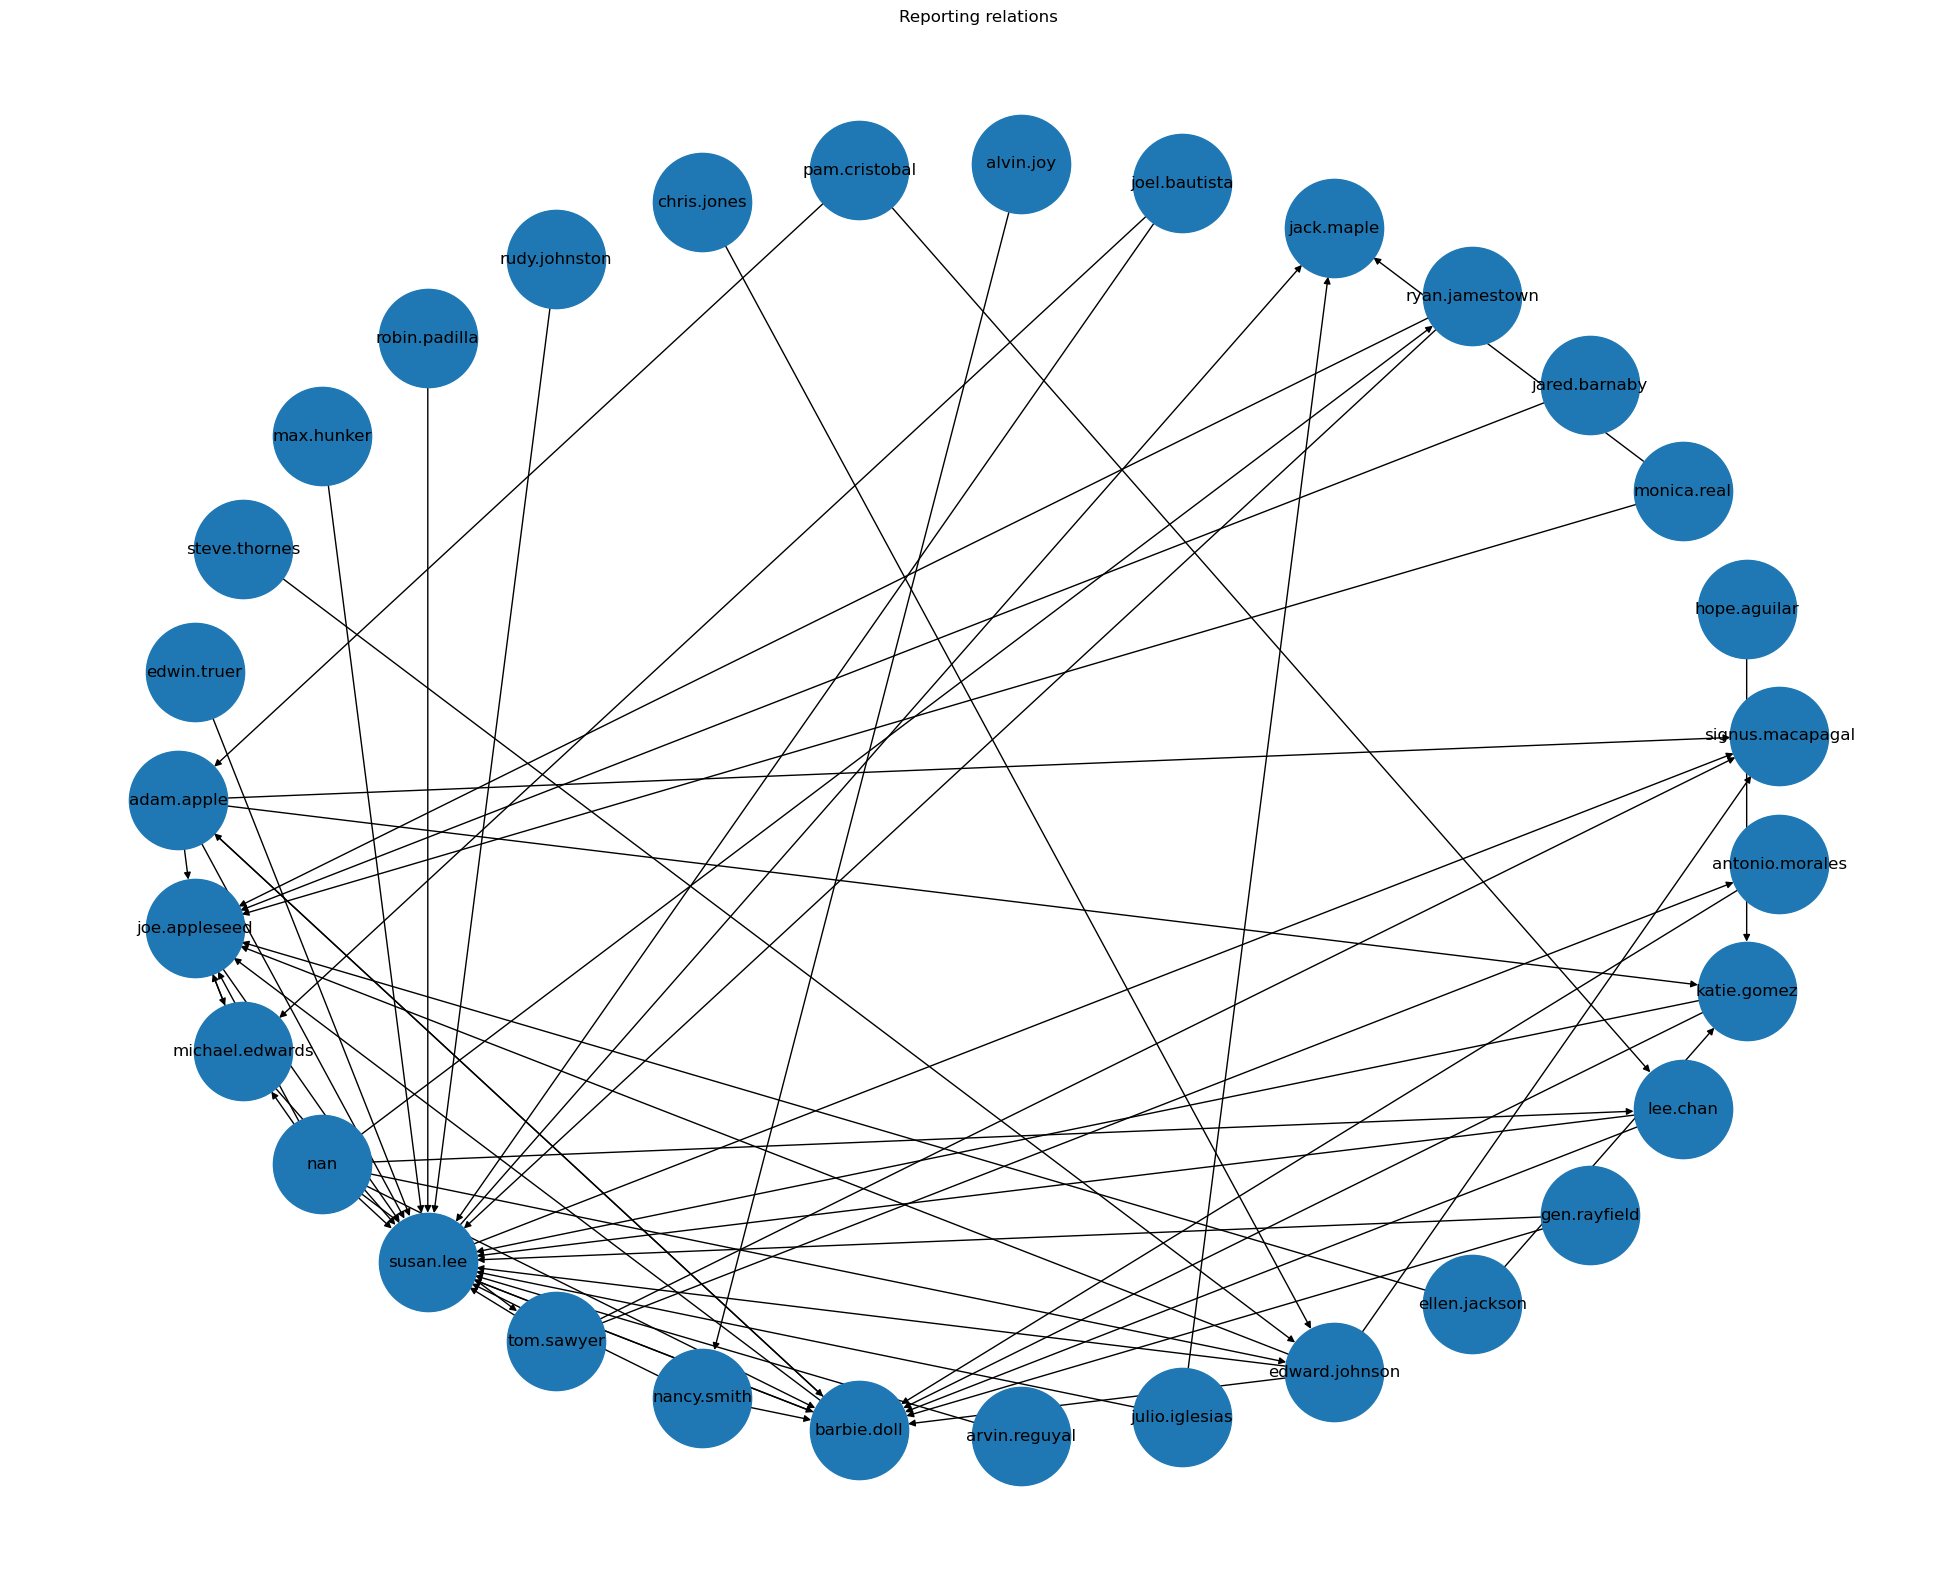

In [40]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

data = pd.read_csv('jira_sample.csv')   #reading file
data = data[['Assignee', 'Reporter']]   #the required columns
index_names = data[ (data['Assignee'] == data['Reporter'])].index   #removing self-reporting
data.drop(index_names, inplace = True)

#plotting
G = nx.DiGraph()   #directed graph
G = nx.from_pandas_edgelist(data, 'Assignee', 'Reporter', create_using=nx.DiGraph())   #adding edges from dataframe
plt.figure(figsize=(25, 20))   #figure size
plt.title('Reporting relations')    #figure heading
nx.draw_shell(G, node_size=5000, with_labels=True)    #nodes with names

[Now, finish up your plot with a Markdown explanation of the key elements of the above code.  It is particularly useful to provide examples of how someone else might want to customize your plot.  For example, perhaps they might want to change colors, font sizes, scales, etc.] 